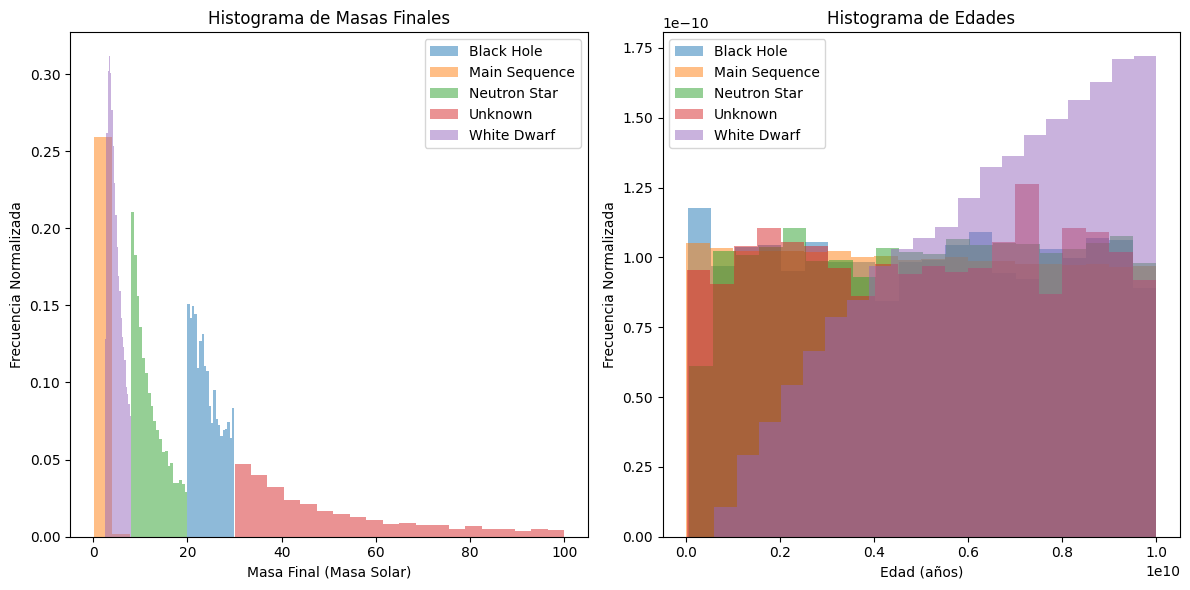

Fracciones de cada tipo de cuerpo estelar en la simulación:
Black Hole: 0.26%
Main Sequence: 94.12%
Neutron Star: 1.35%
Unknown: 0.28%
White Dwarf: 3.99%


In [71]:
import numpy as np
import matplotlib.pyplot as plt

def draw_mass_kroupa(N):
    mass_breaks = [0.08, 0.5, 1]
    alphas = [-1.3, -2.3, -2.3]
    probs = [0.3, 0.4, 0.3]
    min_mass, max_mass = 0.08, 100

    segments = np.random.choice(len(probs), size=N, p=probs)
    m_min = np.choose(segments, mass_breaks + [mass_breaks[-1]])
    m_max = np.choose(segments, mass_breaks[1:] + [max_mass])
    alpha = np.choose(segments, alphas)

    mask = alpha != -1
    mass = np.empty(N)
    mass[mask] = ((m_max[mask] ** (alpha[mask] + 1) - m_min[mask] ** (alpha[mask] + 1)) * np.random.random(mask.sum()) + m_min[mask] ** (alpha[mask] + 1)) ** (1 / (alpha[mask] + 1))
    mass[~mask] = np.exp(np.random.uniform(np.log(m_min[~mask]), np.log(m_max[~mask])))

    return mass

def draw_birth_time(N):
    return np.random.uniform(0, 10e9, N)

def main_sequence_lifetime(mass):
    return 10e10 / np.power(mass, 2.5)

def determine_stellar_remnant(mass, age):
    white_dwarf_mass_limit = 8
    neutron_star_mass_limit = 20
    black_hole_mass_limit = 30

    t_ms = main_sequence_lifetime(mass)
    remnant_types = np.full(mass.shape, 'Unknown', dtype=object)
    remnant_types[age < t_ms] = 'Main Sequence'
    remnant_types[(age >= t_ms) & (mass < white_dwarf_mass_limit)] = 'White Dwarf'
    remnant_types[(age >= t_ms) & (mass >= white_dwarf_mass_limit) & (mass < neutron_star_mass_limit)] = 'Neutron Star'
    remnant_types[(age >= t_ms) & (mass >= neutron_star_mass_limit) & (mass < black_hole_mass_limit)] = 'Black Hole'

    return remnant_types

def simulate_stars(N):
    masses = draw_mass_kroupa(N)
    birth_times = draw_birth_time(N)
    current_age = 10e9
    ages = current_age - birth_times

    star_types = determine_stellar_remnant(masses, ages)
    return star_types, masses, ages

def plot_histograms(star_types, final_masses, final_ages):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for star_type in np.unique(star_types):
        plt.hist(final_masses[star_types == star_type], bins=20, alpha=0.5, label=star_type, density=True)
    plt.xlabel('Masa Final (Masa Solar)')
    plt.ylabel('Frecuencia Normalizada')
    plt.title('Histograma de Masas Finales')
    plt.legend()

    plt.subplot(1, 2, 2)
    for star_type in np.unique(star_types):
        plt.hist(final_ages[star_types == star_type], bins=20, alpha=0.5, label=star_type, density=True)
    plt.xlabel('Edad (años)')
    plt.ylabel('Frecuencia Normalizada')
    plt.title('Histograma de Edades')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def calculate_fractions(star_types):
    unique, counts = np.unique(star_types, return_counts=True)
    fractions = counts / len(star_types)
    return dict(zip(unique, fractions))
# 100, 1000, 10000, 100000, 1000000
N = 1000000
star_types, final_masses, final_ages = simulate_stars(N)
plot_histograms(star_types, final_masses, final_ages)

fractions = calculate_fractions(star_types)
print("Fracciones de cada tipo de cuerpo estelar en la simulación:")
for star_type, fraction in fractions.items():
    print(f"{star_type}: {fraction:.2%}")
